In [1]:
import modules.Analyser.Analyser as an
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from ast import literal_eval
data = an.prepare_data()
data.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies,profit
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]",343554033.0
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",197797249.0
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0,en,[{'name': 'Twentieth Century Fox Film Corporat...,65452156.0
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0,en,"[{'name': 'Regency Enterprises', 'id': 508}, {...",127436818.0
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0,en,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",29350171.0


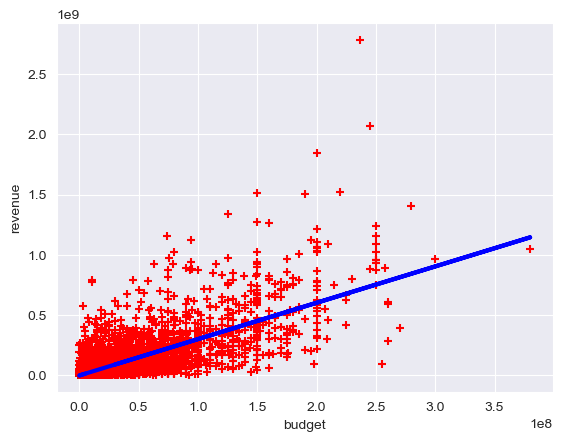

In [2]:
an.linear_regression_func(data,'budget','revenue')

In [3]:
an.revenue_predict(data,'budget','revenue',3000000)

array([5451651.53493028])

In [4]:
an.correlator(data, 'budget','revenue')

Correlation between budget and revenue  is:  0.7299137384488268


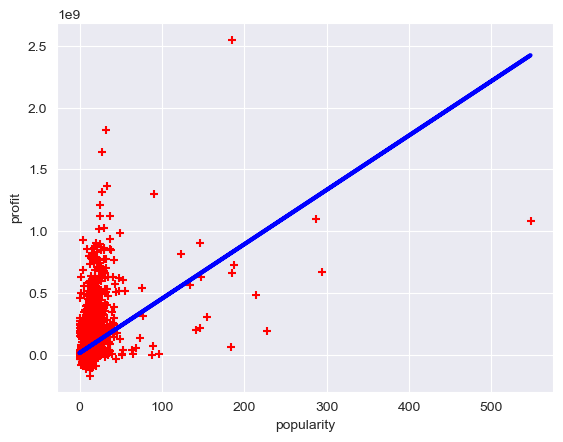

Correlation between popularity and profit  is:  0.43519869501539044


In [5]:
an.linear_regression_func(data,'popularity','profit')
an.correlator(data,'popularity','profit')

J:\4 Semester\python\exam project\MovieMatch\modules\Analyser\Analyser.py:52: UserWarning: Parsing '30/10/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
J:\4 Semester\python\exam project\MovieMatch\modules\Analyser\Analyser.py:52: UserWarning: Parsing '15/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
J:\4 Semester\python\exam project\MovieMatch\modules\Analyser\Analyser.py:52: UserWarning: Parsing '22/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
J:\4 Semester\python\exam project\MovieMatch\modules\Analyser\Analyser.py:52: UserWarning: Parsing '16/11/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for co

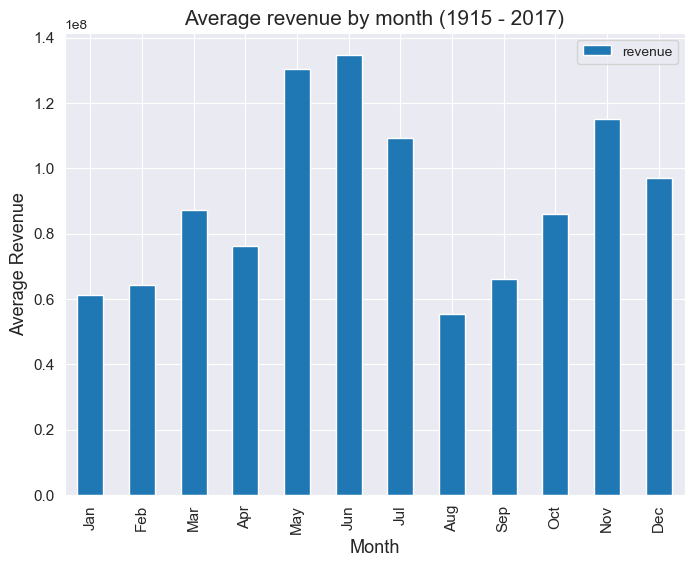

In [6]:
an.average_revenue_by_month(data)

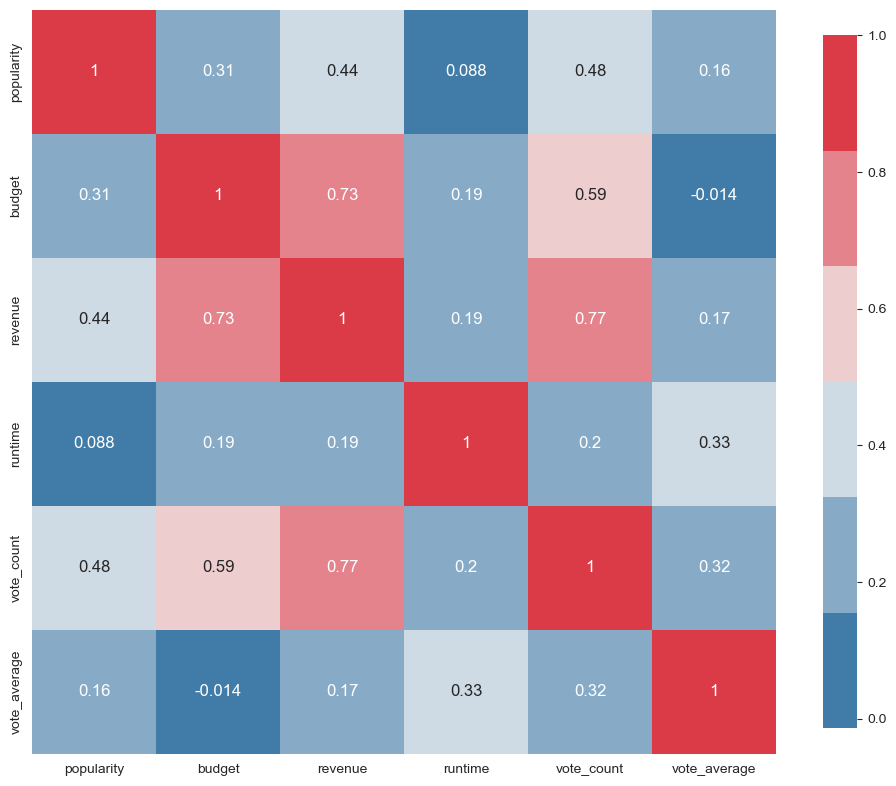

In [7]:
an.plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

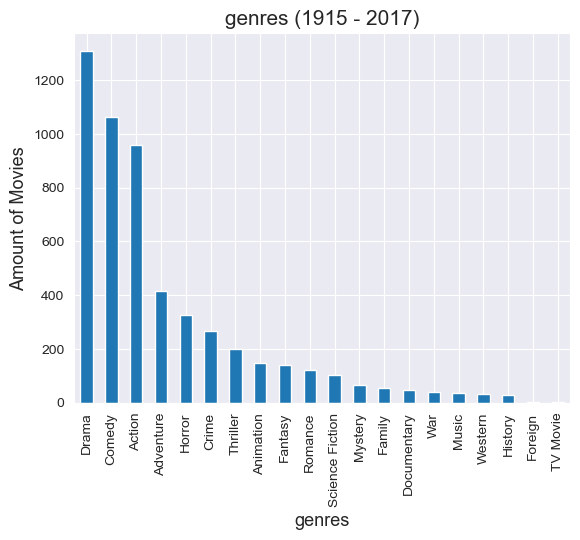

In [8]:
an.plot_genre(data,'genres')

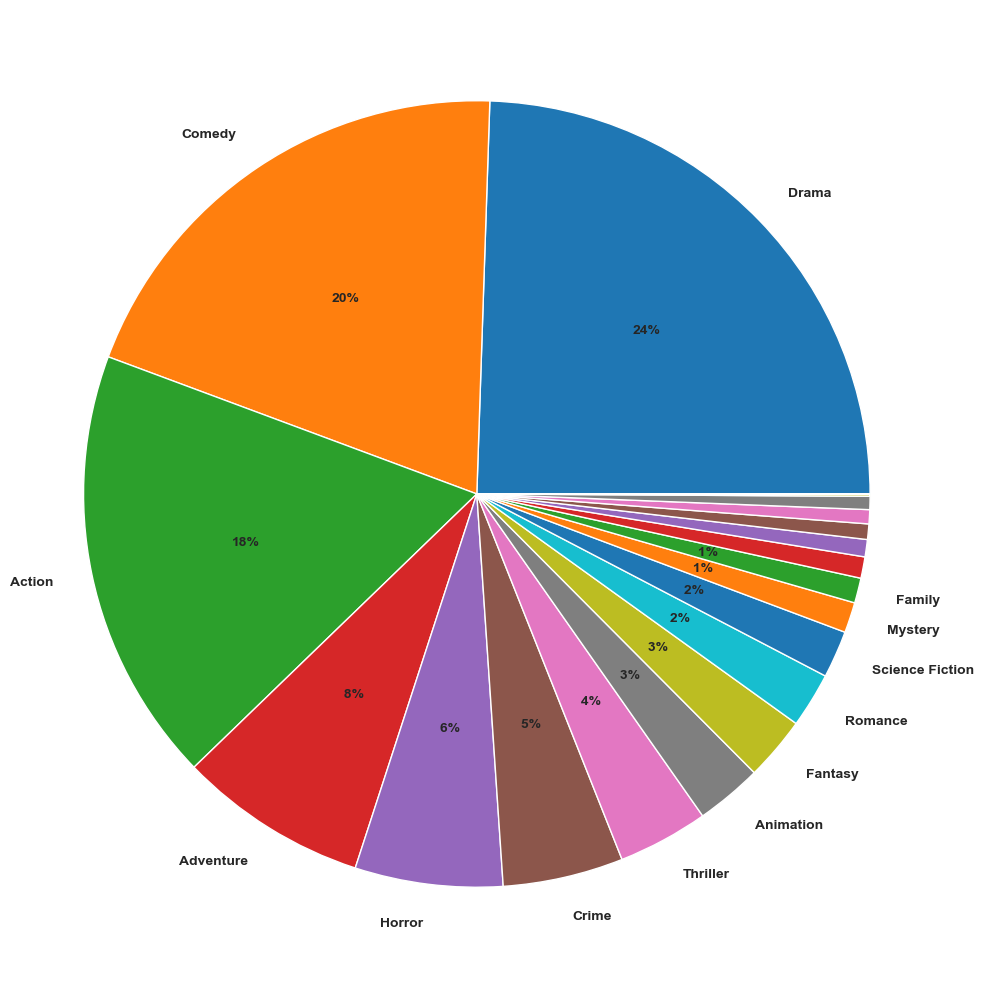

In [9]:
an.plot_genre_pie(data, 'genres')

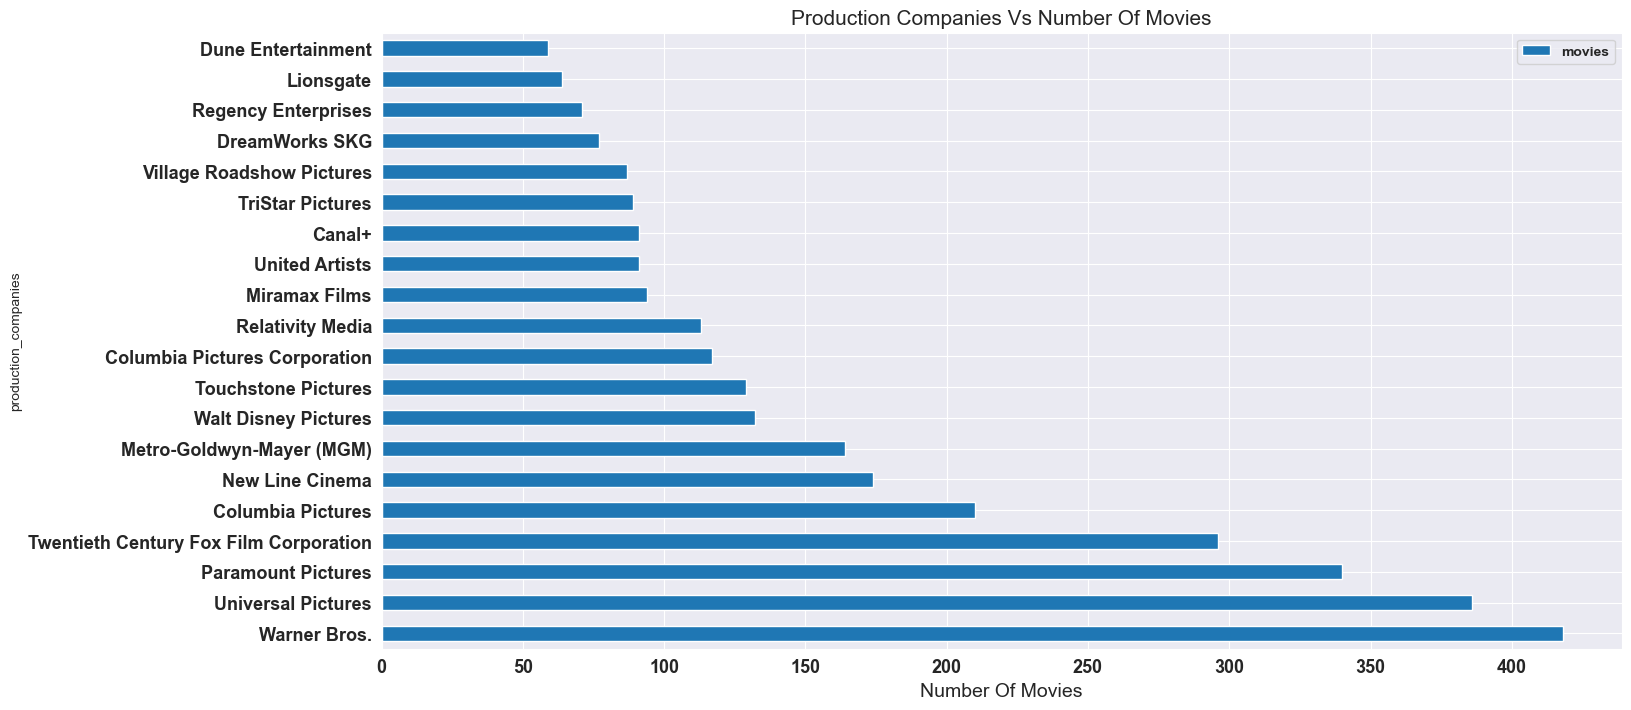

In [10]:
an.plot_production_company(data)

,revenue
genres,
Animation,2.408561e+08
Family,2.406010e+08
Adventure,1.987482e+08
Science Fiction,1.665982e+08
Fantasy,1.327448e+08
Action,1.234665e+08
Thriller,7.473545e+07
Romance,7.012801e+07
History,6.766593e+07


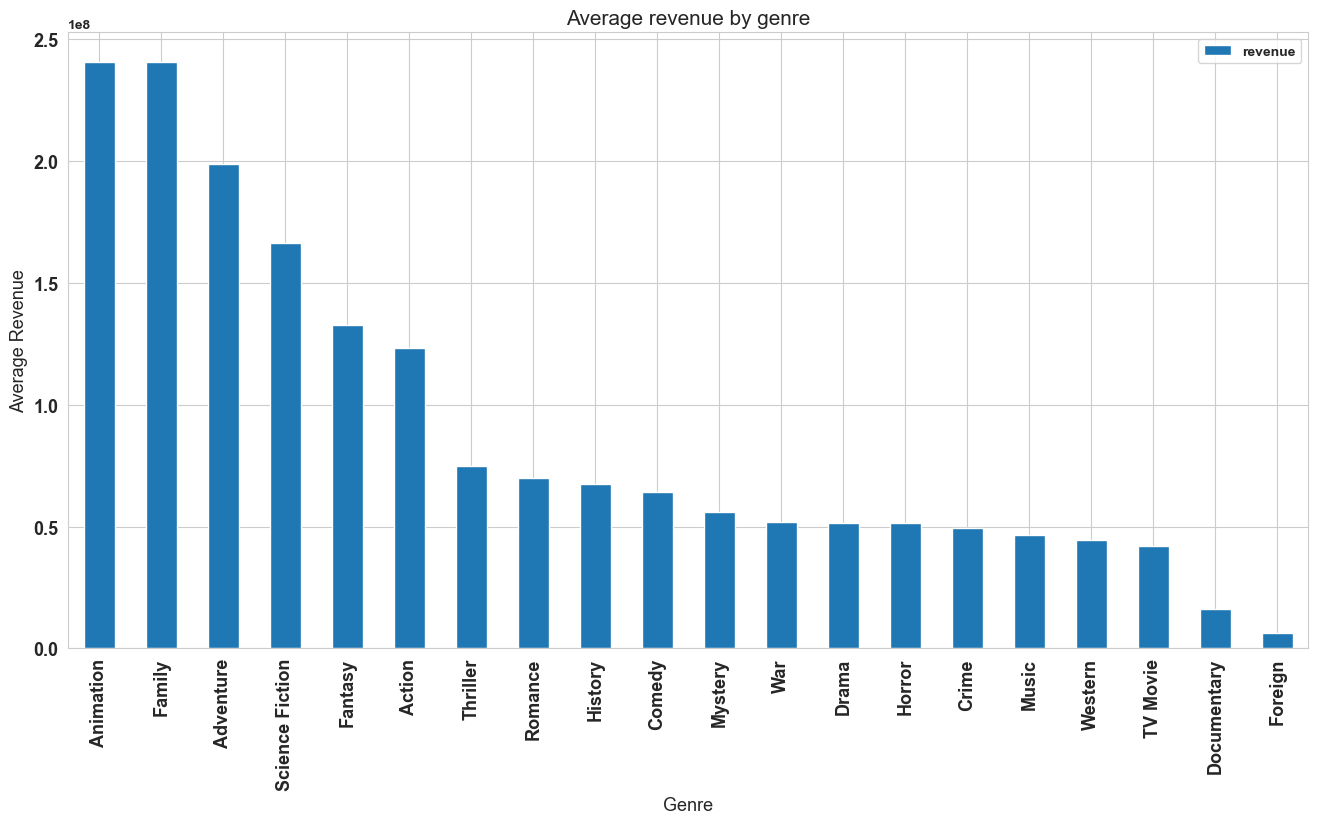

In [11]:
an.plot_average_revenue_by_genre(data)
an.average_revenue_by_genre(data)

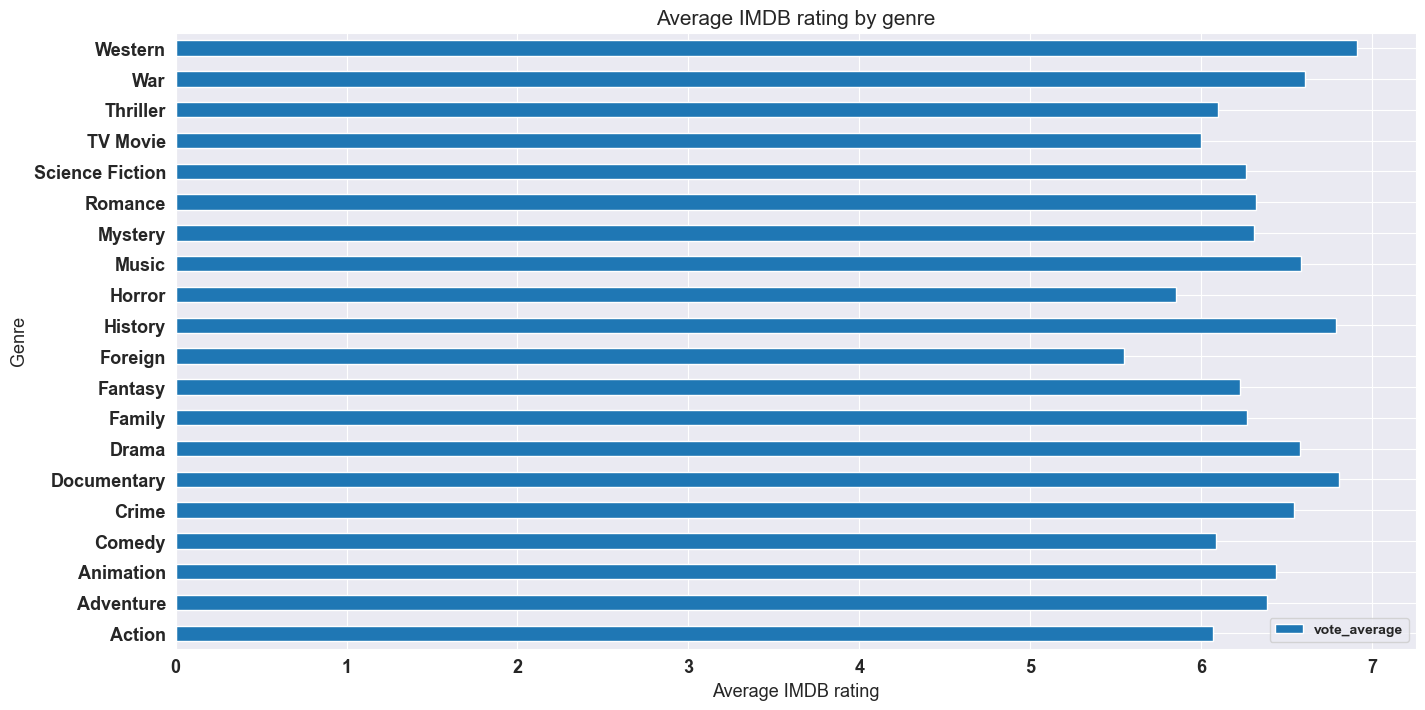

In [12]:
an.plot_average_ratings_by_genre(data)

In [13]:
datatest = pd.read_csv("data/movies_metadata.csv")
datatest = datatest[
        ['budget', 'genres', 'id', 'imdb_id', 'original_title', 'popularity', 'release_date', 'revenue', 'runtime',
         'vote_average', 'vote_count', 'original_language', 'production_companies']]
datatest = datatest[(datatest['genres'] != "[]")]
datatest['genres'] = datatest['genres'].fillna('[]').apply(literal_eval).apply(
        lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
datatest = datatest[(datatest['production_companies'] != "[]")]
datatest['production_companies'] = datatest['production_companies'].fillna('[]').apply(literal_eval).apply(
        lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
datatest.dropna(inplace=True)
datatest = datatest[(datatest.T != 0).all()]
datatest['profit'] = datatest['revenue'] - datatest['budget']
datatest

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies,profit
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0,en,[Pixar Animation Studios],343554033.0
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0,en,"[TriStar Pictures, Teitler Film, Interscope Co...",197797249.0
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0,en,[Twentieth Century Fox Film Corporation],65452156.0
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0,en,"[Regency Enterprises, Forward Pass, Warner Bros.]",127436818.0
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0,en,"[Universal Pictures, Imperial Entertainment, S...",29350171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,60000000.0,"[Action, Western, Science Fiction, Fantasy, Ho...",353491.0,tt1648190,The Dark Tower,50.903593,03/08/2017,71000000.0,95.0,5.7,688.0,en,"[Imagine Entertainment, Weed Road Pictures, Me...",11000000.0
45139,50000000.0,"[Comedy, Family, Animation]",378236.0,tt4877122,The Emoji Movie,33.694599,28/07/2017,66913939.0,86.0,5.8,327.0,en,"[Columbia Pictures, Sony Pictures Animation]",16913939.0
45167,11000000.0,"[Action, Crime, Mystery, Thriller]",395834.0,tt5362988,Wind River,40.796775,03/08/2017,184770205.0,111.0,7.4,181.0,en,"[Thunder Road Pictures, Star Thrower Entertain...",173770205.0
45250,12000000.0,"[Action, Comedy, Drama]",24049.0,tt0479751,சிவாஜி,1.323587,14/06/2007,19000000.0,185.0,6.9,25.0,ta,[AVM Productions],7000000.0


In [14]:

prod = datatest['production_companies'].str[0]
prod


0                       Pixar Animation Studios
1                              TriStar Pictures
3        Twentieth Century Fox Film Corporation
5                           Regency Enterprises
8                            Universal Pictures
                          ...                  
45014                     Imagine Entertainment
45139                         Columbia Pictures
45167                     Thunder Road Pictures
45250                           AVM Productions
45412                                    Profit
Name: production_companies, Length: 5192, dtype: object

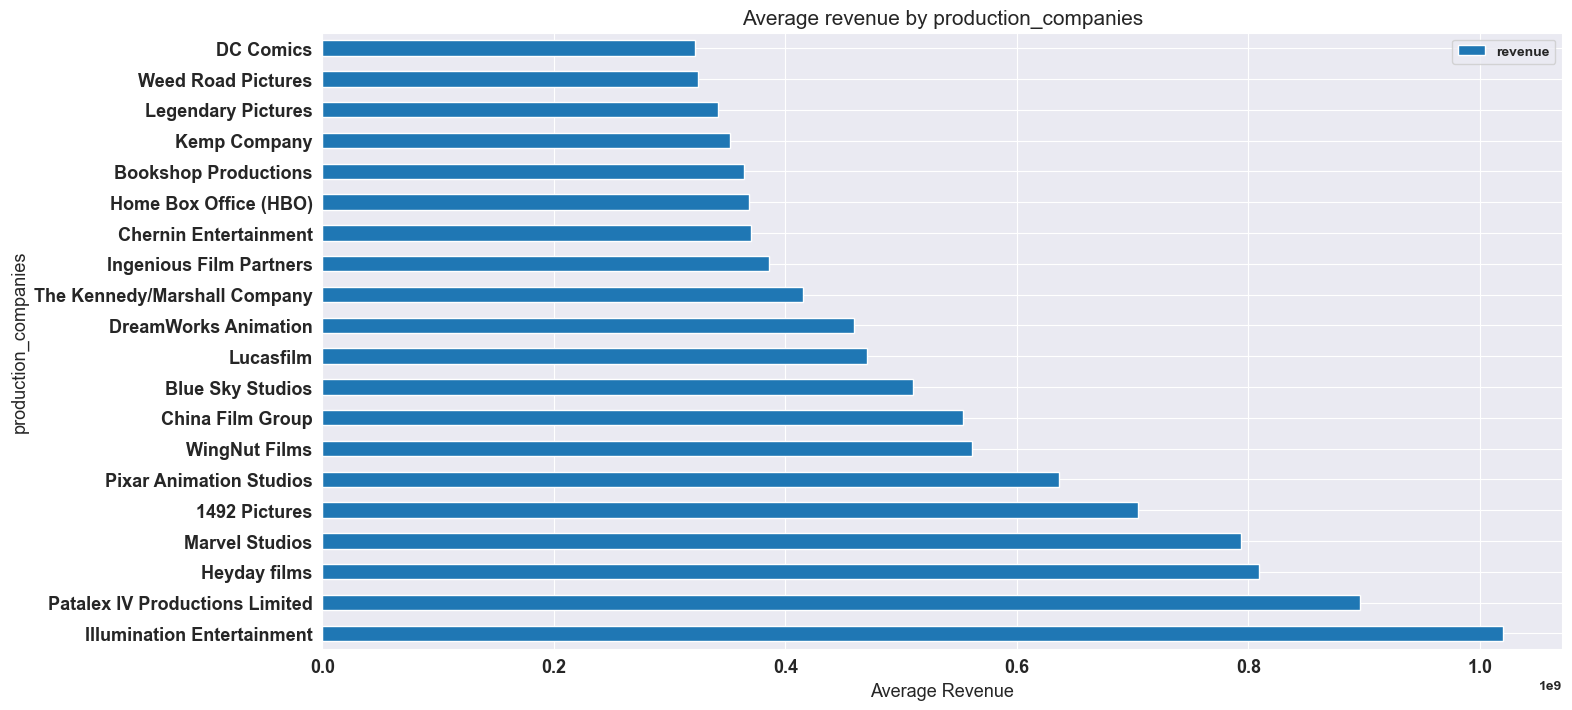

In [15]:
an.plot_average_revenue_by_prod(datatest)